In [2]:
import os
print(os.getcwd())

/Users/user/Desktop


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile

In [4]:
df= pd.read_csv('Hevrin Usage.csv',header= None,skiprows= 17, usecols= [*range(45,70)]) 
# skip rows st start August 1st
# nrows= 730,   nrows st two years to start with: better is all days, then resample to weekly with .resample('W')
print(df.shape)
df.head()
df.columns= ['day','00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
df= df.set_index(df['day'])
df= df.drop(['day'], axis=1)
df.tail(3)
dft= df.stack()
dft=dft.reset_index()
dft.columns= ['day','hour','kwh'] # where 'day' is string, not DT
dft.head(8)
dft['date']= pd.to_datetime(dft['day'] + ' ' + dft['hour'] + ':00:00')
from datetime import datetime
dft['weekday']= dft.date.dt.weekday_name
dft['month']= dft.date.dt.month
dft['year']= dft.date.dt.year
dft.set_index(dft['date'], inplace= True)
dft= dft.drop(['day','date'], axis=1)
dft['hour']= dft['hour'].astype('category')
dft['weekday']= dft['weekday'].astype('category')
dft['month']= dft['month'].astype('category')
dft['year']= dft['year'].astype('category')
dft.info()
dft.head()

(2788, 25)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66505 entries, 2011-08-01 00:00:00 to 2019-03-19 02:00:00
Data columns (total 5 columns):
hour       66505 non-null category
kwh        66505 non-null float64
weekday    66505 non-null category
month      66505 non-null category
year       66505 non-null category
dtypes: category(4), float64(1)
memory usage: 1.3 MB


,hour,kwh,weekday,month,year
date,,,,,
2011-08-01 00:00:00,00,0.77,Monday,8,2011
2011-08-01 01:00:00,01,0.64,Monday,8,2011
2011-08-01 02:00:00,02,0.70,Monday,8,2011
2011-08-01 03:00:00,03,0.58,Monday,8,2011
2011-08-01 04:00:00,04,0.58,Monday,8,2011


In [5]:
df_17= dft[dft.year== 2017]
kwh_17= df_17.kwh.tolist()
df_17.head(3)

# Repeat for other years
df_16= dft[dft.year== 2016]
kwh_16= df_16.kwh.tolist()

df_15= dft[dft.year== 2015]
kwh_15= df_15.kwh.tolist()
df_14= dft[dft.year== 2014]
kwh_14= df_14.kwh.tolist()
df_13= dft[dft.year== 2013]
kwh_13= df_13.kwh.tolist()
df_12= dft[dft.year== 2012]
kwh_12= df_12.kwh.tolist()

In [6]:
import random  # n=50 later for ROC Curve?
# random.seed(27)
def Season_list(list,n):
    ### creates n metering-records, each 13 weeks long for the Season, from a list of 13 weeks x 6 years(2013-2017)###
    S= []
    for i in range(n):
        a= [random.choice(list) for p in range(13)]      # List Comprehension to draw 13 weeks of 168 hours
        b= [item for sublist in a for item in sublist]   # Flatten each List-of-lists into a single list
        S.append(b)
    return S

In [7]:
# importing Original Data to make a df with 96 Summer Meter Records
# Repeat for Summer: SU
# create nested list 13 weeks of 168 hours each for Summer (SU)
SU_17= kwh_17[4368:6552] 
SU17_weekly= [ SU_17[i:i+168] for i in range(0,2184,168)] 
SU_16= kwh_16[4368:6552]
SU16_weekly= [SU_16[i:i+168] for i in range(0,2184,168)] 
SU_15= kwh_15[4368:6552]
SU15_weekly= [SU_15[i:i+168] for i in range(0,2184,168)] 
SU_14= kwh_14[4368:6552]
SU14_weekly= [SU_14[i:i+168] for i in range(0,2184,168)] 

SU_13= kwh_13[4368:6552]
SU13_weekly= [SU_13[i:i+168] for i in range(0,2184,168)] 
SU_12= kwh_12[4368:6552]
SU12_weekly= [SU_12[i:i+168] for i in range(0,2184,168)] 

SU_weekly= SU17_weekly + SU16_weekly + SU15_weekly + SU14_weekly + SU13_weekly + SU12_weekly
len(SU_weekly)

su= Season_list(SU_weekly,96)    # Note 96 records, NOT 100 as must match the 12 transformers w 8 meters each
# This generates a dataframe from the list of lists; This is exactly what we need!!
dfSU= pd.DataFrame(su)
dfSU.shape  # (96 rows, 2184 columns) OK
dfSU.T.tail(5)  # no NaN    # TRANSPOSED PURELY FOR VISUALIZATON PURPOSES !!

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
2179,0.70,0.58,1.54,0.51,1.41,1.28,0.70,1.600,1.41,0.90,...,0.700,0.90,0.64,2.75,0.77,1.92,1.15,0.70,1.54,0.58
2180,0.70,0.64,0.77,0.58,1.15,1.79,0.64,2.496,1.92,1.09,...,0.640,0.90,0.96,2.11,0.83,0.77,1.09,0.70,0.77,0.51
2181,0.58,0.96,0.64,0.64,1.22,0.64,0.64,4.610,2.43,2.11,...,0.700,0.96,1.15,1.60,0.83,0.58,1.22,0.58,0.64,0.58
2182,0.77,1.47,1.34,0.51,2.62,0.45,0.70,3.710,1.02,3.33,...,0.640,0.90,2.24,1.54,1.15,0.58,1.60,0.77,1.34,0.96
2183,0.70,2.18,2.56,0.58,2.18,0.38,0.83,2.370,2.75,3.65,...,0.832,0.96,3.33,0.45,0.83,0.64,1.73,0.70,2.56,1.09


# Create df for additional 13 weeks May 16 to August 14th  

In [8]:
df_May= pd.read_excel('Hevrin_pdf_May.xlsx',sheet_name='Sheet1', dtype= {0: 'str'}, header= None,skiprows= 2, usecols= None) 
print(df_May.shape)  
df_May.head()
df_May.info()  
# first column was inferred as datetime, different from pd.read_csv, when a string. But now string ia dtype dict!
df_May.columns= ['day','00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
df_May.head(3)

(91, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 25 columns):
0     91 non-null object
1     91 non-null float64
2     91 non-null float64
3     91 non-null float64
4     91 non-null float64
5     91 non-null float64
6     91 non-null float64
7     91 non-null float64
8     91 non-null float64
9     91 non-null float64
10    91 non-null float64
11    91 non-null float64
12    91 non-null float64
13    91 non-null float64
14    91 non-null float64
15    91 non-null float64
16    91 non-null float64
17    91 non-null float64
18    91 non-null float64
19    91 non-null float64
20    91 non-null float64
21    91 non-null float64
22    91 non-null float64
23    91 non-null float64
24    91 non-null float64
dtypes: float64(24), object(1)
memory usage: 17.9+ KB


,day,00,01,02,03,04,05,06,07,08,...,14,15,16,17,18,19,20,21,22,23
0,2019-05-16 00:00:00,0.58,0.51,0.58,0.58,4.42,8.38,10.43,4.54,9.73,...,8.960,6.53,2.05,2.37,0.45,1.47,9.02,1.98,1.47,0.96
1,2019-05-17 00:00:00,1.09,0.64,0.51,0.70,0.38,0.38,0.38,0.32,0.26,...,0.320,0.45,0.32,0.77,0.70,1.09,9.41,10.05,1.54,0.64
2,2019-05-18 00:00:00,0.32,0.51,0.38,0.38,0.38,0.38,0.32,1.73,2.88,...,1.024,0.70,0.96,1.41,1.34,0.77,8.77,2.75,0.96,1.02


In [9]:
df_May= df_May.set_index(df_May['day'])
df_May= df_May.drop(['day'], axis=1)
df_May.info()
df_May.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 2019-05-16 00:00:00 to 2019-08-14 00:00:00
Data columns (total 24 columns):
00    91 non-null float64
01    91 non-null float64
02    91 non-null float64
03    91 non-null float64
04    91 non-null float64
05    91 non-null float64
06    91 non-null float64
07    91 non-null float64
08    91 non-null float64
09    91 non-null float64
10    91 non-null float64
11    91 non-null float64
12    91 non-null float64
13    91 non-null float64
14    91 non-null float64
15    91 non-null float64
16    91 non-null float64
17    91 non-null float64
18    91 non-null float64
19    91 non-null float64
20    91 non-null float64
21    91 non-null float64
22    91 non-null float64
23    91 non-null float64
dtypes: float64(24)
memory usage: 17.8+ KB


,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
2019-05-16 00:00:00,0.58,0.51,0.58,0.58,4.42,8.38,10.43,4.54,9.73,0.64,...,8.960,6.53,2.05,2.37,0.45,1.47,9.02,1.98,1.47,0.96
2019-05-17 00:00:00,1.09,0.64,0.51,0.70,0.38,0.38,0.38,0.32,0.26,0.32,...,0.320,0.45,0.32,0.77,0.70,1.09,9.41,10.05,1.54,0.64
2019-05-18 00:00:00,0.32,0.51,0.38,0.38,0.38,0.38,0.32,1.73,2.88,0.70,...,1.024,0.70,0.96,1.41,1.34,0.77,8.77,2.75,0.96,1.02


In [10]:
df_May= df_May.stack()
df_May= df_May.reset_index()
df_May.columns= ['day','hour','kwh'] # where 'day' is string, not DT
df_May.head(3)

,day,hour,kwh
0,2019-05-16 00:00:00,00,0.58
1,2019-05-16 00:00:00,01,0.51
2,2019-05-16 00:00:00,02,0.58


In [11]:
def MT_mapping(number_of_meters, transformer_capacity):   # aka Meter-Transformer Mapping
    ### returns a pandas series that can be used to index the meter df for a subsequent .groupby(transformer_ID).sum() 
    meters_per_transformer= transformer_capacity//3.0 #25/3.1 -> 8  # flat division rounds down to the nearest integer
    number_of_transformers = int(number_of_meters//meters_per_transformer) # so if 96 meters we have 12 transformers
    # while a whole number technicaly a float, so needed to change type to 'int'
    print('number of transformers:' + ' ' + str(number_of_transformers))
    x= list(range(number_of_transformers)) 
    y= np.repeat(x,meters_per_transformer)
    print(y)
    z= pd.Series(y)
    z= z.astype('category') # the integers converted to category (NOT z.to_string())  to facilitate the groupby
    # print(z)          # Looks good! Just diplayed vertically with the index as a Series
    return z

# meter_transformer_mapping(96,25) # so we have 12 transformers with 8 meters each.THIS is OK!

In [12]:
MT_mapping(100, 15) # 20 transformers OK!

number of transformers: 20
[ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4
  4  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9
  9  9 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14
 14 14 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19
 19 19 19 19]


0      0
1      0
2      0
3      0
4      0
5      1
6      1
7      1
8      1
9      1
10     2
11     2
12     2
13     2
14     2
15     3
16     3
17     3
18     3
19     3
20     4
21     4
22     4
23     4
24     4
25     5
26     5
27     5
28     5
29     5
      ..
70    14
71    14
72    14
73    14
74    14
75    15
76    15
77    15
78    15
79    15
80    16
81    16
82    16
83    16
84    16
85    17
86    17
87    17
88    17
89    17
90    18
91    18
92    18
93    18
94    18
95    19
96    19
97    19
98    19
99    19
Length: 100, dtype: category
Categories (20, int64): [0, 1, 2, 3, ..., 16, 17, 18, 19]

# MAPPING MODIFIED TO ANTICIPATE TESLA INTEGRATION

In [13]:
def MT_mapping_minus_Tesla(n_transformers, transformer_capacity):
    ### returns a pandas series that can be used to index the meter df for a subsequent .groupby(transformer).sum() 
    meters_per_transformer= transformer_capacity//3.0 - 1 #25/3 -> 8-1= 7 # flat division rounds down to nearest integer
    n_meters= n_transformers * meters_per_transformer
    x= list(range(n_transformers)) 
    y= np.repeat(x,meters_per_transformer)
    print(y)
    z= pd.Series(y)
    z= z.astype('category') # the integers converted to category (NOT z.to_string())  to facilitate the groupby
    # print(z)          # Looks good! Just diplayed vertically with the index as a Series
    return z

In [14]:
MT_mapping_minus_Tesla(100,15) # looks OK

[ 0  0  0  0  1  1  1  1  2  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5
  6  6  6  6  7  7  7  7  8  8  8  8  9  9  9  9 10 10 10 10 11 11 11 11
 12 12 12 12 13 13 13 13 14 14 14 14 15 15 15 15 16 16 16 16 17 17 17 17
 18 18 18 18 19 19 19 19 20 20 20 20 21 21 21 21 22 22 22 22 23 23 23 23
 24 24 24 24 25 25 25 25 26 26 26 26 27 27 27 27 28 28 28 28 29 29 29 29
 30 30 30 30 31 31 31 31 32 32 32 32 33 33 33 33 34 34 34 34 35 35 35 35
 36 36 36 36 37 37 37 37 38 38 38 38 39 39 39 39 40 40 40 40 41 41 41 41
 42 42 42 42 43 43 43 43 44 44 44 44 45 45 45 45 46 46 46 46 47 47 47 47
 48 48 48 48 49 49 49 49 50 50 50 50 51 51 51 51 52 52 52 52 53 53 53 53
 54 54 54 54 55 55 55 55 56 56 56 56 57 57 57 57 58 58 58 58 59 59 59 59
 60 60 60 60 61 61 61 61 62 62 62 62 63 63 63 63 64 64 64 64 65 65 65 65
 66 66 66 66 67 67 67 67 68 68 68 68 69 69 69 69 70 70 70 70 71 71 71 71
 72 72 72 72 73 73 73 73 74 74 74 74 75 75 75 75 76 76 76 76 77 77 77 77
 78 78 78 78 79 79 79 79 80 80 80 80 81 81 81 81 82

0       0
1       0
2       0
3       0
4       1
5       1
6       1
7       1
8       2
9       2
10      2
11      2
12      3
13      3
14      3
15      3
16      4
17      4
18      4
19      4
20      5
21      5
22      5
23      5
24      6
25      6
26      6
27      6
28      7
29      7
       ..
370    92
371    92
372    93
373    93
374    93
375    93
376    94
377    94
378    94
379    94
380    95
381    95
382    95
383    95
384    96
385    96
386    96
387    96
388    97
389    97
390    97
391    97
392    98
393    98
394    98
395    98
396    99
397    99
398    99
399    99
Length: 400, dtype: category
Categories (100, int64): [0, 1, 2, 3, ..., 96, 97, 98, 99]

In [15]:
# Creating Tesla Time series from the two different periods
m1T = dft['2019-02-12':'2019-03-18'].kwh.reset_index()    #This is the first period for Tesla metering
T1= m1T.kwh.tolist()

T2= df_May.kwh.tolist() # This is the second period
len(T2) # 2184

2184

In [16]:
m1T = dft['2019-02-12':'2019-03-18'].kwh.reset_index()    #This is the first period for Tesla metering
T1= m1T.kwh.tolist()

T2= df_May.kwh.tolist()
len(T2) # 2184

T= T1 + T2 # as two Python lists, they are concatenated, to comprise 18 weeks fromwhich 13 can be drawn via 'choice'
len(T)

T_weekly= [ T[i:i+168] for i in range(0,3024,168)]  # now have 18 weeks of Tesla hourly records to draw 13 weeks from.
len(T_weekly)

import random
mrT= [random.choice(T_weekly) for i in range(13)]  # m1 is Metering Record 1
mrT[0]
len(mrT) # 13 : so we have a list of lists, drawn at random

# We now need to flatten the list-of-lists into a single list of length 168 x 14 weeks
fmrT = [item for sublist in mrT for item in sublist]
len(fmrT) # 2184 : a flat list of 13 weeks chosen at random 
# We now need to repeat this 100x and add to dataframe

Tesla= Season_list(T_weekly,100)
len(Tesla)   # 840 only, we need 2184??

dfTesla= pd.DataFrame(Tesla) # Have a df for Tesla of 18 observations:need to calc metrics then append it to a season  
dfTesla.shape       

(100, 2184)

In [17]:
# How many Tesla Records do we need to create?? One for each transformer!!
# Suppose 15 kVA capacity: 4 non-EV records per transformer, so 400 Summer records and 100 Tesla 

In [18]:
su_400= Season_list(SU_weekly,400)  # Note 400 records, NOT 100 as must match the 100 transformers w 4 non-EV meters each
# This generates a dataframe from the list of lists; This is exactly what we need!!
dfSU_400= pd.DataFrame(su_400)
dfSU_400.shape  # (96 rows, 2184 columns) OK
dfSU_400.T.tail(5)  # no NaN    # TRANSPOSED PURELY FOR VISUALIZATON PURPOSES !!

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
2179,1.600,3.71,0.51,2.30,1.79,0.700,0.90,2.30,1.54,1.28,...,1.54,0.700,2.94,1.98,1.41,1.41,1.98,0.51,2.75,0.51
2180,2.496,1.22,0.58,2.62,1.92,0.640,0.90,2.62,1.54,1.41,...,0.77,0.700,1.73,2.56,0.96,1.15,3.39,0.58,2.11,0.64
2181,4.610,1.34,0.64,1.60,1.60,0.700,0.96,1.60,2.24,2.18,...,0.64,0.640,0.70,0.64,0.64,1.22,3.84,0.64,1.60,0.58
2182,3.710,3.20,0.51,4.42,3.90,0.640,0.90,4.42,2.69,5.18,...,1.34,0.700,0.70,1.15,0.58,2.62,3.33,0.51,1.54,0.45
2183,2.370,2.69,0.58,2.24,4.03,0.832,0.96,2.24,2.82,1.92,...,2.56,0.832,0.58,2.11,0.64,2.18,1.86,0.58,0.45,0.32


In [19]:
MT_mapping_minus_Tesla(100,15)  # (100,15) # OK!

[ 0  0  0  0  1  1  1  1  2  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5
  6  6  6  6  7  7  7  7  8  8  8  8  9  9  9  9 10 10 10 10 11 11 11 11
 12 12 12 12 13 13 13 13 14 14 14 14 15 15 15 15 16 16 16 16 17 17 17 17
 18 18 18 18 19 19 19 19 20 20 20 20 21 21 21 21 22 22 22 22 23 23 23 23
 24 24 24 24 25 25 25 25 26 26 26 26 27 27 27 27 28 28 28 28 29 29 29 29
 30 30 30 30 31 31 31 31 32 32 32 32 33 33 33 33 34 34 34 34 35 35 35 35
 36 36 36 36 37 37 37 37 38 38 38 38 39 39 39 39 40 40 40 40 41 41 41 41
 42 42 42 42 43 43 43 43 44 44 44 44 45 45 45 45 46 46 46 46 47 47 47 47
 48 48 48 48 49 49 49 49 50 50 50 50 51 51 51 51 52 52 52 52 53 53 53 53
 54 54 54 54 55 55 55 55 56 56 56 56 57 57 57 57 58 58 58 58 59 59 59 59
 60 60 60 60 61 61 61 61 62 62 62 62 63 63 63 63 64 64 64 64 65 65 65 65
 66 66 66 66 67 67 67 67 68 68 68 68 69 69 69 69 70 70 70 70 71 71 71 71
 72 72 72 72 73 73 73 73 74 74 74 74 75 75 75 75 76 76 76 76 77 77 77 77
 78 78 78 78 79 79 79 79 80 80 80 80 81 81 81 81 82

0       0
1       0
2       0
3       0
4       1
5       1
6       1
7       1
8       2
9       2
10      2
11      2
12      3
13      3
14      3
15      3
16      4
17      4
18      4
19      4
20      5
21      5
22      5
23      5
24      6
25      6
26      6
27      6
28      7
29      7
       ..
370    92
371    92
372    93
373    93
374    93
375    93
376    94
377    94
378    94
379    94
380    95
381    95
382    95
383    95
384    96
385    96
386    96
387    96
388    97
389    97
390    97
391    97
392    98
393    98
394    98
395    98
396    99
397    99
398    99
399    99
Length: 400, dtype: category
Categories (100, int64): [0, 1, 2, 3, ..., 96, 97, 98, 99]

In [20]:
dfSU_400['transformer_ID']= MT_mapping_minus_Tesla(100,15)  # (100,15) # 
# dfSU['transformer_ID'][0:20]
dfSU_400.T.tail(3) # OK

[ 0  0  0  0  1  1  1  1  2  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5
  6  6  6  6  7  7  7  7  8  8  8  8  9  9  9  9 10 10 10 10 11 11 11 11
 12 12 12 12 13 13 13 13 14 14 14 14 15 15 15 15 16 16 16 16 17 17 17 17
 18 18 18 18 19 19 19 19 20 20 20 20 21 21 21 21 22 22 22 22 23 23 23 23
 24 24 24 24 25 25 25 25 26 26 26 26 27 27 27 27 28 28 28 28 29 29 29 29
 30 30 30 30 31 31 31 31 32 32 32 32 33 33 33 33 34 34 34 34 35 35 35 35
 36 36 36 36 37 37 37 37 38 38 38 38 39 39 39 39 40 40 40 40 41 41 41 41
 42 42 42 42 43 43 43 43 44 44 44 44 45 45 45 45 46 46 46 46 47 47 47 47
 48 48 48 48 49 49 49 49 50 50 50 50 51 51 51 51 52 52 52 52 53 53 53 53
 54 54 54 54 55 55 55 55 56 56 56 56 57 57 57 57 58 58 58 58 59 59 59 59
 60 60 60 60 61 61 61 61 62 62 62 62 63 63 63 63 64 64 64 64 65 65 65 65
 66 66 66 66 67 67 67 67 68 68 68 68 69 69 69 69 70 70 70 70 71 71 71 71
 72 72 72 72 73 73 73 73 74 74 74 74 75 75 75 75 76 76 76 76 77 77 77 77
 78 78 78 78 79 79 79 79 80 80 80 80 81 81 81 81 82

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
2182,3.71,3.2,0.51,4.42,3.9,0.64,0.9,4.42,2.69,5.18,...,1.34,0.7,0.7,1.15,0.58,2.62,3.33,0.51,1.54,0.45
2183,2.37,2.69,0.58,2.24,4.03,0.832,0.96,2.24,2.82,1.92,...,2.56,0.832,0.58,2.11,0.64,2.18,1.86,0.58,0.45,0.32
transformer_ID,0,0,0,0,1,1,1,1,2,2,...,97,97,98,98,98,98,99,99,99,99


In [21]:
# Groupby Transformer_ID, should give 100 items
transformer_loads_400= dfSU_400.groupby(dfSU_400.transformer_ID) # added ,axis=1   , axis=1
transformer_loads_400

In [22]:
df400_loads= transformer_loads_400.sum().reset_index(drop= True) # this is a df
df400_loads
type(df400_loads)
df400_loads.shape # (100,2184) OK!
# Now have sums for 100 transformers, in a df 100 x 2184: must create a matching df for Tesla

(100, 2184)

In [23]:
Tesla= Season_list(T_weekly,100)
len(Tesla)   # 840 only, we need 2184??

df_Tesla= pd.DataFrame(Tesla) # Have a df for Tesla of 100 observations:need to calc metrics then append it to a season  
df_Tesla.shape 

(100, 2184)

In [24]:
print(type(df400_loads),type(df_Tesla))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [25]:
# df_add = df1.add(df2, fill_value=0)
df_total_loads_15kVA= df400_loads.add(df_Tesla) # adding two dataframes w same shape, element by element
# TypeError: unsupported operand type(s) for +: 'float' and 'str'

0.02009157509157509

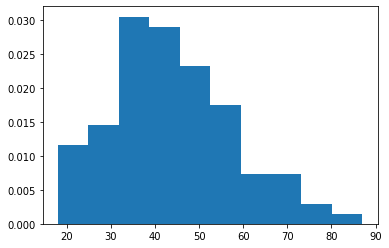

In [26]:
hours_overloaded= df_total_loads_15kVA[ df_total_loads_15kVA > 15].count(axis=1)
plt.hist(hours_overloaded, density= True)
sum(hours_overloaded)/(2184 * 100)  # during 1.94% of the Summer hours, a transformer is overloaded

In [27]:
df_total_loads_15kVA[ df_total_loads_15kVA > 15].max(axis=1) #  

0     21.880
1     21.940
2     20.930
3     20.610
4     18.040
5     20.990
6     20.020
7     19.330
8     21.000
9     23.740
10    24.510
11    21.440
12    19.770
13    20.990
14    21.250
15    22.330
16    21.360
17    20.420
18    21.250
19    20.018
20    18.170
21    18.820
22    19.966
23    22.150
24    18.370
25    28.720
26    20.610
27    19.720
28    22.470
29    20.090
       ...  
70    22.540
71    19.840
72    19.900
73    20.862
74    27.250
75    21.510
76    19.460
77    26.250
78    19.710
79    23.680
80    29.242
81    20.674
82    18.750
83    19.590
84    20.740
85    20.234
86    20.540
87    22.460
88    21.940
89    24.060
90    19.710
91    20.286
92    21.570
93    23.110
94    25.210
95    26.430
96    21.110
97    20.800
98    22.410
99    21.370
Length: 100, dtype: float64

(array([ 6., 18., 25., 28., 17.,  4.,  0.,  1.,  0.,  1.]),
 array([1.05973333, 1.07891119, 1.09808904, 1.11726689, 1.13644475,
        1.1556226 , 1.17480045, 1.19397831, 1.21315616, 1.23233401,
        1.25151186]),
 <a list of 10 Patch objects>)

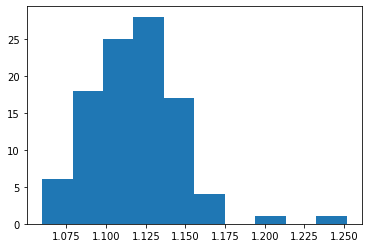

In [28]:
mean_overloading_15kVA= df_total_loads_15kVA[ df_total_loads_15kVA > 15].mean(axis=1) # 95% of time < 10% overloading 
mean_overloading_percent_15kVA= mean_overloading_15kVA/15
plt.hist(mean_overloading_percent_15kVA, density= False)

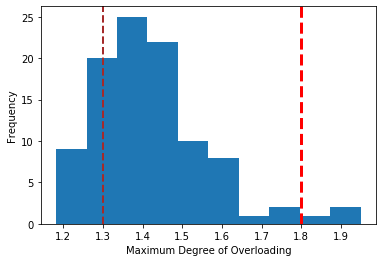

In [66]:
max_overloading_15kVA= df_total_loads_15kVA[ df_total_loads_15kVA > 15].max(axis=1) # 95% of time < 10% overloading 
max_overloading_percent_15kVA= max_overloading_15kVA/15
plt.hist(max_overloading_percent_15kVA, density= False)
plt.xlabel('Maximum Degree of Overloading')
plt.ylabel('Frequency')
plt.axvline(1.3, color='brown', linestyle='dashed', linewidth=2) # 130% implies Brown-Out
plt.axvline(1.8, color='r', linestyle='dashed', linewidth=3) # 180% implies 'Catastrophic Failure': Explosion/Fire

(array([ 9., 20., 25., 22., 10.,  8.,  1.,  2.,  1.,  2.]),
 array([1.182     , 1.25874667, 1.33549333, 1.41224   , 1.48898667,
        1.56573333, 1.64248   , 1.71922667, 1.79597333, 1.87272   ,
        1.94946667]),
 <a list of 10 Patch objects>)

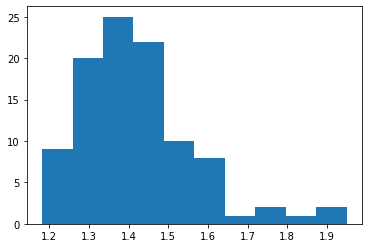

In [64]:
plt.hist(max_overloading_percent_15kVA, density= False)


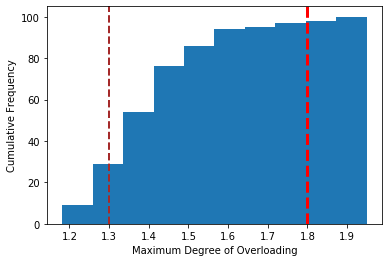

In [67]:
plt.hist(max_overloading_percent_15kVA, cumulative= True, density= False)
plt.xlabel('Maximum Degree of Overloading')
plt.ylabel('Cumulative Frequency')
plt.axvline(1.3, color='brown', linestyle='dashed', linewidth=2) # 130% implies Brown-Out
plt.axvline(1.8, color='r', linestyle='dashed', linewidth=3) # 180% implies 'Catastrophic Failure': Explosion/Fire
# plt.title('Cumulative Frequency of 100 Transformers of 15 kVA Capacity being Overloaded during the Summer ')

In [31]:
# So c.74 of the 100 transformers would have been overloaded by 130% or more at leat once, triggering a brownout
# Two of the 100 transformers were overloaded "catastrophically" by more than 180% (fire/explosion risk)

(array([  9.,  29.,  54.,  76.,  86.,  94.,  95.,  97.,  98., 100.]),
 array([1.182     , 1.25874667, 1.33549333, 1.41224   , 1.48898667,
        1.56573333, 1.64248   , 1.71922667, 1.79597333, 1.87272   ,
        1.94946667]),
 <a list of 10 Patch objects>)

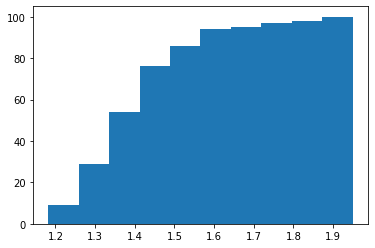

In [32]:
plt.hist(max_overloading_percent_15kVA, cumulative= True, density= False)
# With no labels, the respective percentiles are numerically listed

In [33]:
# DWW write function return (a) df of each transformer, and (b) tuple of times overloaded, mean, > 130%, > 180%.

# Repeat for 25 kVA Transformer Capacity and 700 meters, to give 100 Transformer Sample

In [34]:
su_700= Season_list(SU_weekly,700)  # Note 700 records, NOT 100 as must match the 100 transformers w 7 non-EV meters each
# This generates a dataframe from the list of lists; This is exactly what we need!!
dfSU_700= pd.DataFrame(su_700)
dfSU_700.shape  # (96 rows, 2184 columns) OK
dfSU_700.T.tail(5)  # no NaN    # TRANSPOSED PURELY FOR VISUALIZATON PURPOSES !!

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
2179,0.70,0.64,0.51,0.38,2.75,3.71,0.96,2.75,0.70,1.09,...,1.41,0.960,0.51,1.41,0.38,1.41,2.94,0.38,3.01,2.30
2180,0.45,0.77,0.58,0.32,2.11,1.22,0.77,2.11,0.70,0.45,...,1.15,0.960,0.58,1.22,0.32,1.92,1.73,0.38,2.62,1.86
2181,0.38,4.22,0.64,0.38,1.60,1.34,1.09,1.60,0.58,0.45,...,1.22,0.510,0.64,0.64,0.38,2.43,0.70,0.38,1.54,2.11
2182,0.45,0.64,0.51,0.38,1.54,3.20,1.09,1.54,0.77,0.38,...,2.62,1.344,0.51,0.64,0.38,1.02,0.70,0.38,1.28,1.79
2183,0.32,0.45,0.58,0.38,0.45,2.69,2.18,0.45,0.70,0.51,...,2.18,4.540,0.58,0.64,0.38,2.75,0.58,0.38,1.34,1.22


In [35]:
# MT_mapping_minus_Tesla(100,25) # looks OK : 100 transformer, 25 kVA capacity

In [36]:
dfSU_700['transformer_ID']= MT_mapping_minus_Tesla(100,25)  # (100,15) # 
# dfSU['transformer_ID'][0:20]
dfSU_700.T.tail(3) # OK

[ 0  0  0  0  0  0  0  1  1  1  1  1  1  1  2  2  2  2  2  2  2  3  3  3
  3  3  3  3  4  4  4  4  4  4  4  5  5  5  5  5  5  5  6  6  6  6  6  6
  6  7  7  7  7  7  7  7  8  8  8  8  8  8  8  9  9  9  9  9  9  9 10 10
 10 10 10 10 10 11 11 11 11 11 11 11 12 12 12 12 12 12 12 13 13 13 13 13
 13 13 14 14 14 14 14 14 14 15 15 15 15 15 15 15 16 16 16 16 16 16 16 17
 17 17 17 17 17 17 18 18 18 18 18 18 18 19 19 19 19 19 19 19 20 20 20 20
 20 20 20 21 21 21 21 21 21 21 22 22 22 22 22 22 22 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 25 25 25 25 25 25 25 26 26 26 26 26 26 26 27 27 27
 27 27 27 27 28 28 28 28 28 28 28 29 29 29 29 29 29 29 30 30 30 30 30 30
 30 31 31 31 31 31 31 31 32 32 32 32 32 32 32 33 33 33 33 33 33 33 34 34
 34 34 34 34 34 35 35 35 35 35 35 35 36 36 36 36 36 36 36 37 37 37 37 37
 37 37 38 38 38 38 38 38 38 39 39 39 39 39 39 39 40 40 40 40 40 40 40 41
 41 41 41 41 41 41 42 42 42 42 42 42 42 43 43 43 43 43 43 43 44 44 44 44
 44 44 44 45 45 45 45 45 45 45 46 46 46 46 46 46 46

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
2182,0.45,0.64,0.51,0.38,1.54,3.2,1.09,1.54,0.77,0.38,...,2.62,1.344,0.51,0.64,0.38,1.02,0.7,0.38,1.28,1.79
2183,0.32,0.45,0.58,0.38,0.45,2.69,2.18,0.45,0.7,0.51,...,2.18,4.54,0.58,0.64,0.38,2.75,0.58,0.38,1.34,1.22
transformer_ID,0,0,0,0,0,0,0,1,1,1,...,98,98,98,99,99,99,99,99,99,99


In [37]:
# Groupby Transformer_ID, should give 100 items
transformer_loads_700= dfSU_700.groupby(dfSU_700.transformer_ID) # added ,axis=1   , axis=1
transformer_loads_700

df700_loads= transformer_loads_700.sum().reset_index(drop= True) # this is a df
df700_loads
type(df700_loads)
df700_loads.shape # (100,2184) OK!
# Now have sums for 100 transformers in a df 100 x 2184: already have a matching df for Tesla (dfTesla) (100 records)

(100, 2184)

In [38]:
df_total_loads_25kVA= df700_loads.add(df_Tesla) #

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([19., 15., 14., 15.,  9.,  7.,  1.,  2.,  3.,  3.]),
 array([1.0004 , 1.03504, 1.06968, 1.10432, 1.13896, 1.1736 , 1.20824,
        1.24288, 1.27752, 1.31216, 1.3468 ]),
 <a list of 10 Patch objects>)

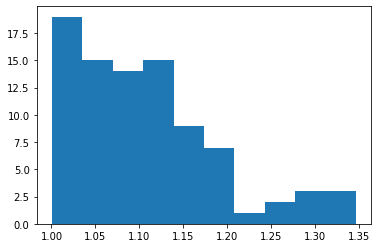

In [39]:
max_overloading_25kVA= df_total_loads_25kVA[ df_total_loads_25kVA > 25].max(axis=1) # 95% of time < 10% overloading 
max_overloading_percent_25kVA= max_overloading_25kVA/25
plt.hist(max_overloading_percent_25kVA, density= False)

In [40]:
# Now only one transformer of 100 will exceed the Brown-out threshold for a 25 kVA (and none 'Catastrophic')

In [41]:
# now repeat for 1,000 or even 10,000 transformers (eg LIPA has 4,000 Tesla's !!) SMUD ??
# 

In [42]:
# For 1000 Teslas (and so 1000 transformers also)
su_7000= Season_list(SU_weekly,7000)  
dfSU_7000= pd.DataFrame(su_7000)
dfSU_7000['transformer_ID']= MT_mapping_minus_Tesla(1000,25)

[  0   0   0 ... 999 999 999]


In [43]:
transformer_loads_7000= dfSU_7000.groupby(dfSU_7000.transformer_ID)
df7000_loads= transformer_loads_7000.sum().reset_index(drop= True) # this is a df

In [44]:
Tesla_1000= Season_list(T_weekly,1000)
df_Tesla_1000= pd.DataFrame(Tesla_1000)

In [45]:
df_25kVA_1000= df7000_loads.add(df_Tesla_1000) 

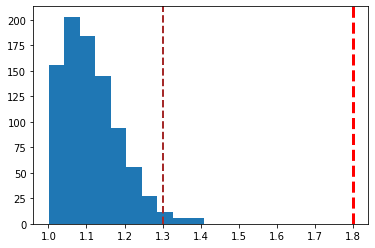

In [68]:
max_overloading_25kVA_1000= df_25kVA_1000[ df_25kVA_1000 > 25].max(axis=1) # 95% of time < 10% overloading 
max_overloading_percent_25kVA_1000= max_overloading_25kVA_1000/25
plt.hist(max_overloading_percent_25kVA_1000, density= False)
plt.axvline(1.3, color='brown', linestyle='dashed', linewidth=2) # 130% implies Brown-Out
plt.axvline(1.8, color='r', linestyle='dashed', linewidth=3) # 180% implies 'Catastrophic Failure': Explosion/Fire

(array([156., 203., 184., 145.,  94.,  56.,  27.,  12.,   6.,   6.]),
 array([1.0004 , 1.04112, 1.08184, 1.12256, 1.16328, 1.204  , 1.24472,
        1.28544, 1.32616, 1.36688, 1.4076 ]),
 <a list of 10 Patch objects>)

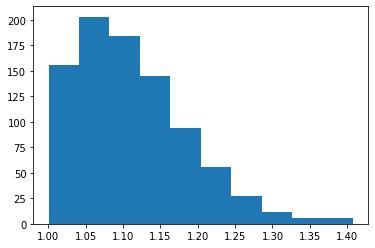

In [47]:
plt.hist(max_overloading_percent_25kVA_1000, density= False) # with no labels, data is displayed!
# so below, 36 of 1,000 Transformers would brown out (21 + 6 + 5 + 1 + 3)

In [48]:
# next use .apply() to compute number of hours shortened per Summer

In [49]:
# later can adjust this to Two Teslas per transformer !! Add two Tesla matrices df_Tesla and reduce meters
# EASY !!!

# Two-Tesla 25 kVA Case

In [52]:
su_600= Season_list(SU_weekly,600)
dfSU_600= pd.DataFrame(su_600)
dfSU_600['transformer_ID']= MT_mapping_minus_Tesla(100,25) 

[ 0  0  0  0  0  0  0  1  1  1  1  1  1  1  2  2  2  2  2  2  2  3  3  3
  3  3  3  3  4  4  4  4  4  4  4  5  5  5  5  5  5  5  6  6  6  6  6  6
  6  7  7  7  7  7  7  7  8  8  8  8  8  8  8  9  9  9  9  9  9  9 10 10
 10 10 10 10 10 11 11 11 11 11 11 11 12 12 12 12 12 12 12 13 13 13 13 13
 13 13 14 14 14 14 14 14 14 15 15 15 15 15 15 15 16 16 16 16 16 16 16 17
 17 17 17 17 17 17 18 18 18 18 18 18 18 19 19 19 19 19 19 19 20 20 20 20
 20 20 20 21 21 21 21 21 21 21 22 22 22 22 22 22 22 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 25 25 25 25 25 25 25 26 26 26 26 26 26 26 27 27 27
 27 27 27 27 28 28 28 28 28 28 28 29 29 29 29 29 29 29 30 30 30 30 30 30
 30 31 31 31 31 31 31 31 32 32 32 32 32 32 32 33 33 33 33 33 33 33 34 34
 34 34 34 34 34 35 35 35 35 35 35 35 36 36 36 36 36 36 36 37 37 37 37 37
 37 37 38 38 38 38 38 38 38 39 39 39 39 39 39 39 40 40 40 40 40 40 40 41
 41 41 41 41 41 41 42 42 42 42 42 42 42 43 43 43 43 43 43 43 44 44 44 44
 44 44 44 45 45 45 45 45 45 45 46 46 46 46 46 46 46

In [55]:
transformer_loads_600= dfSU_600.groupby(dfSU_600.transformer_ID) # added ,axis=1   , axis=1
df600_loads= transformer_loads_600.sum().reset_index(drop= True) 

In [56]:
Tesla_1= Season_list(T_weekly,100)
Tesla_2= Season_list(T_weekly,100)
df1_Tesla= pd.DataFrame(Tesla_1) 
df2_Tesla= pd.DataFrame(Tesla_2)
df_Two_Tesla= df1_Tesla.add(df2_Tesla)
df_Two_Tesla.shape

(100, 2184)

In [80]:
df_loads_2Tesla_25kVA= df600_loads.add(df_Two_Tesla) 


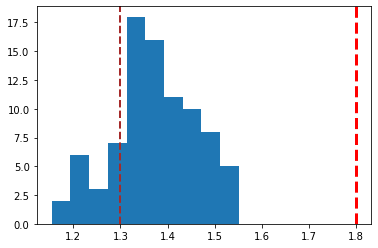

In [81]:
df_loads_2Tesla_25kVA= df_loads_2Tesla_25kVA[ df_loads_2Tesla_25kVA > 25].max(axis=1)

# 95% of time < 10% overloading 
max_overloading_percent_2Tesla= df_loads_2Tesla_25kVA/25   #ERROR HERE !?
plt.hist(max_overloading_percent_2Tesla, density= False)
plt.axvline(1.3, color='brown', linestyle='dashed', linewidth=2) # 130% implies Brown-Out
plt.axvline(1.8, color='r', linestyle='dashed', linewidth=3) # 180% implies 'Catastrophic Failure': Explosion/Fire

(array([ 2.,  6.,  3.,  7., 18., 16., 11., 10.,  8.,  5.]),
 array([1.15448 , 1.194152, 1.233824, 1.273496, 1.313168, 1.35284 ,
        1.392512, 1.432184, 1.471856, 1.511528, 1.5512  ]),
 <a list of 10 Patch objects>)

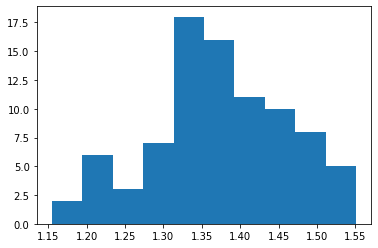

In [59]:
plt.hist(max_overloading_percent_2Tesla, density= False)
# for 25 kVA transformer, 8 meters, 2 of which are Tesla
# 11 (= 2+6+3)of the 100 transformers did not exceed 130% overloading during the Summer
# 89 of the 100 transformers did exceed 130% overloading during the Summer

# Updated Hevrin Tesla data (c.May15-August 15)

In [ ]:
df_May= pd.read_excel('Hevrin_pdf_May.xlsx',sheet_name='Sheet1',  dtype= {0: 'str'}, header= None,skiprows= 2, usecols= None) 
print(df_May.shape)     # date now read as string via dict 
df_May.head()

In [ ]:
df_May.columns= ['day','00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
df_May.head(3)

In [ ]:
df_May.info() # Now pd.read_excel imported day as string

In [ ]:
df_May= df_May.set_index(df_May['day'])
df_May.tail(3)

In [ ]:
df_May= df_May.drop(['day'], axis=1) 

In [ ]:
dft2= df_May.stack()
dft2=dft2.reset_index()
dft2.columns= ['day','hour','kwh'] # where 'day' is string, not DT
dft2.tail()

In [ ]:
dft2.info()  # Day is datetime !!

In [ ]:
df_May.index
df_May.index.values

In [ ]:
df_May['day']= df_May.to_string()
type(df_May)
df_May.info()

In [ ]:
df_May= df_May.set_index(df_May['day'])   # Sequence order of Code may be jumbled here!!
df_May.tail(3)

In [ ]:
# df_May.reset_index(inplace= True) # DWW change to range index??
df_May.reset_index(inplace= True)
df_May.index = list(range(len(df_May)))
df_May.info()
# now we have the desired range index and 'day' is a column and a string/object, NOT DateTime

In [ ]:
# prior code copied again here
dft['date']= pd.to_datetime(dft['day'] + ' ' + dft['hour'] + ':00:00')
from datetime import datetime
dft['weekday']= dft.date.dt.weekday_name
dft['month']= dft.date.dt.month
dft['year']= dft.date.dt.year
dft.set_index(dft['date'], inplace= True)
dft= dft.drop(['day','date'], axis=1)
dft['hour']= dft['hour'].astype('category')
dft['weekday']= dft['weekday'].astype('category')
dft['month']= dft['month'].astype('category')
dft['year']= dft['year'].astype('category')
dft.info()
dft.head()

In [ ]:
P14[2170:2184]  #17 16 15 14 OK
len(P14) # 17,16,: 2184  but P15 is 2172 only!! P 14 is 2170 Fundamentalproblem is different lengths!!

In [ ]:
import numpy as np
import pandas as pd
def MT_mapping_minus_Tesla(transformer_capacity):
    ### returns a pandas series that can be used to index the meter df for a subsequent .groupby(transformer).sum() 
    n_transformers = 20
    meters_per_transformer= transformer_capacity//3.0 - 1 #25/3 -> 8-1= 7 # flat division rounds down to nearest integer
    n_meters= n_transformers * meters_per_transformer
    x= list(range(n_transformers)) 
    y= np.repeat(x,meters_per_transformer)
    print(y)
    z= pd.Series(y)
    z= z.astype('category') # the integers converted to category (NOT z.to_string())  to facilitate the groupby
    # print(z)          # Looks good! Just diplayed vertically with the index as a Series
    return z

In [ ]:
# add 2 columns for transformer letter and capacity 15,

def hours_overloaded(df):
    """returns the number of hours a year a transformer was overloaded if sized off 3.1 kwh/residence"""
    df_B = [df > 3.1]  # creating a Boolean for when 3.1 kwh threshold is exceeded: df[df > 3.1] records actual values
    instances= df_B.sum(axis = 1, skipna = True) 
    return plt.hist(instances)
# then apply an exponential age acceleration function to the actual values normalised by 3.1

In [ ]:
# Establishing a Historical Baseline for New May to August Tesla data 
len(dft['kwh'].loc['2018-5-16':'2018-8-14']) # 13 weeks exactly, so x 168 hours
P17= dft.kwh['2017-5-16':'2017-8-13'].reset_index(drop= True) # otherwise old index made a column!!!
P16= dft.kwh['2016-5-16':'2016-8-13'].reset_index(drop= True)
P17 + P16 # This is now OK!! no NaN
# P18 + P17 Last 16 values are NaN whether 8-13 or 8-15 is chosen (was excerpted to PHEV period??)
P18= dft.kwh['2018-5-16':'2018-8-14']
P18= P18.reset_index()
P18= dft['kwh'].loc['2018-5-16':'2018-8-14'].reset_index()
P17= dft['kwh'].loc['2017-5-16':'2017-8-14'].reset_index()
type(P18)
# two_periods= P18 + P17
# len(two_periods) # ?? TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

In [ ]:
# dft['kwh'].loc['2018-5-16':'2018-8-14'][-5:] OK to drop minutes specification
# if we add Pandas Series, with datetime index will be concatenated, so must reset index first!!

P17= dft['kwh'].loc['2017-5-16':'2017-8-14'].reset_index(drop= True)
P16= dft['kwh'].loc['2016-5-16':'2016-8-14'].reset_index(drop= True)
P15= dft['kwh'].loc['2015-5-16':'2015-8-14'].reset_index(drop= True) 
P15= P15.fillna(method= 'bfill')  # DOES NOT HELP AS THE PROBLEM IS A 12 HOUR SHORTER LIST 
# COULD JUST ADD/APPEND 12 & 14 HOURS TO MAKE ALL LENGTHS EQUAL !!
P14= dft['kwh'].loc['2014-5-16':'2014-8-14'].reset_index(drop= True)
P14= P14.fillna(method= 'bfill')

four_years= P17 + P16 + P15 + P14
charge_baseline= four_years/4
charge_baseline= charge_baseline.fillna(method= 'bfill')

len(charge_baseline) # now 2184 OK
charge_baseline[2165:2184] # whoops last 14 values are again NaN !!!  Due to a Leap Year ??

In [ ]:
# DWW: Want to infer charging spikes: take hourly data then subtract baseline for same interval 
# OLS regression with temporal variables only : 
# Select Time Range (Method 2)  Use this method if your data frame is indexed by time.

# Set index  df = df.set_index(df['date'])

# Select observations between two datetimes
# df.loc['2019-5-16 00:00:00':'2019-8-14 23:00:00']

In [ ]:
type(dfSU)  # pandas.core.frame.DataFrame
dfSU.shape
dfSU > 3.1 # all displayed are false
dfSU[dfSU > 3.1].fillna(0)

df_B                                       # displays as strings True False
# type(df_B) # Hmmm...type is list, not df
sum(df_B)                                  # displays as 1/0 True False
df_B= pd.DataFrame(df_B)
df_B.shape   # (1, 1) !!
# instances= df_B.sum(axis = 1, skipna = True) 
df_B

df_B = [dfSU > 3.1]  # creating a Boolean for when 3.1 kwh threshold is exceeded: df[df > 3.1] records actual values
instances= df_B.sum(axis = 1, skipna = True) 

import matplotlib.pyplot as plt
df_overload_factors= dfSU[dfSU > 3.1]/3.1
df_overload_factors.round(2)
# DWW: But need to add in groups to dimension the diversity benefit!!
overloads= df_overload_factors.mean(skipna= True, axis= 1)  # returns the 100 cases, mostly around 1.3 oddly!!
len(overloads) # 100
plt.hist(overloads)



In [ ]:
df_May['date']= pd.to_datetime(df_May['day'] + ' ' + df_May['hour'] + ':00:00') #KeyError: 'day'

df_May.head()

from datetime import datetime                           # oddly code ran OK before!
# df_May['weekday']= df_May['Date'].dt.weekday_name      # DWW V Bad choice of variable name as 'keyword'???
# df_May['weekday']= df_May.Date.dt.weekday_name        # AttributeError: 'DataFrame' object has no attribute 'date'
df_May['weekday']= df_May['date'].dt.weekday_name    # KeyError: 'date'


df_May['month']= df_May.date.dt.month
df_May['year']= df_May.date.dt.year
df_May.set_index(df_May['date'], inplace= True)
df_May= df_May.drop(['day','date'], axis=1)
df_May['hour']= dft['hour'].astype('category')
df_May['weekday']= dft['weekday'].astype('category')
df_May['month']= dft['month'].astype('category')
df_May['year']= dft['year'].astype('category')
df_May.info()
df_May.head(3)

# df_May['day']= df_May.day.to_string()
# df_May.info() # day is now an 'object'/string, as desired
df_May['day'] = df_May['day']  + ' ' + df_May['hour'] + ':00:00'

df_May= df_May.drop(['day'], axis=1) # DONT DROP HERE AS NEED DAY COLUMN TO CREATE STRING TO MAKE DATETIME INDEX!

dft2= df_May.stack()
dft2=dft2.reset_index()
dft2.columns= ['day','hour','kwh'] # where 'day' is string, not DT
dft2.tail()



dft2['day'] + ' ' + dft2['hour'] + ':00:00' # data type " " not understood....Hmmm NOT  A PROBLEM ABOVE in cell 9!!

# dft2['day'].dt.strftime('%Y-%m-%d') + ' ' + dft2['hour'] + ':00:00'

dft2['date']= pd.to_datetime(dft2['day'].dt.strftime + ' ' + dft2['hour'] + ':00:00') # No longer runs!???

len(dft2.kwh)


from datetime import datetime
dft2['weekday']= dft2.date.dt.weekday_name
dft2['month']= dft2.date.dt.month
dft2['year']= dft2.date.dt.year
dft2.set_index(dft2['date'], inplace= True)
dft2= dft2.drop(['day','date'], axis=1)
dft2['hour']= dft2['hour'].astype('category')
dft2['weekday']= dft2['weekday'].astype('category')
dft2['month']= dft2['month'].astype('category')
dft2['year']= dft2['year'].astype('category')
dft2.info()
dft2.head()

In [ ]:
dfF.head()

f[0][2174:]  # Lists are not of equal length

sum(f[0])

import numpy as np
# np.nan in F_15 False
# np.nan in F_16   F
# np.nan in F_17  F
# np.nan in F_14  F
# np.nan in F_13    F
np.nan in F_12   # False!! 

from collections import Counter
F_17.count('Nan')
[item.count(Nan) for item in [F_17,F_16,F_15,F_14,F_13,F_12]] # list of zeros [0, 0, 0, 0, 0, 0]
F_weekly.count('Nan') # 0

# NEXT MERGE ALL Four SEASONS AND THEN ADD A datetime index so can carve out the night hours
# check added columns w .shape ! 
df_annual= pd.concat([dfW,dfSP,dfSU],axis=1,ignore_index= True) # excludes dfF for now due to Nan problems!
df_annual.shape  # (100, 6552) as expected

df_annual.T.tail(5)  # Hmmm why so many Nan ?!